In [1]:
import pandas as pd
import numpy as np

In [20]:
#다니쉬 csv 파일 불러오기

jeju_df_1 = pd.read_csv('../jeju_Danish.csv', index_col=0)
jeju_df_1 #타협해서 331개 ㅠ

,img_name,label_name
1,다니쉬1,"Building,Tree,Font,Neighbourhood,Architecture,..."
2,다니쉬2,"Food,Semifreddo,Dish,Cuisine,Dessert,Parfait,I..."
3,다니쉬3,"Building,Door,Neighbourhood,Architecture,Facad..."
4,다니쉬4,"Text,Font,Summer,Graphic design,Graphics,Clip art"
5,다니쉬5,"Photograph,Blue,Yellow,Snapshot,Street fashion..."
...,...,...
327,다니쉬327,"Dish,Food,Cuisine,Garnish,À la carte food,Ingr..."
328,다니쉬328,"Light,Room,Window,Daylighting,Architecture,Win..."
329,다니쉬329,"Drink,Chinese herb tea,Food,Roasted barley tea..."
330,다니쉬330,"Dish,Food,Cuisine,Baked goods,Ingredient,Mouna..."


In [3]:
# jeju_df_1 = jeju_df_1[['img_name', 'label_name']]
jeju_df_1.index = np.arange(1, len(jeju_df_1)+1)
jeju_df_1

,Unnamed: 0,img_name,label_name
1,1,다니쉬1,"Building,Tree,Font,Neighbourhood,Architecture,..."
2,2,다니쉬2,"Food,Semifreddo,Dish,Cuisine,Dessert,Parfait,I..."
3,3,다니쉬3,"Building,Door,Neighbourhood,Architecture,Facad..."
4,4,다니쉬4,"Text,Font,Summer,Graphic design,Graphics,Clip art"
5,5,다니쉬5,"Photograph,Blue,Yellow,Snapshot,Street fashion..."
...,...,...,...
327,327,다니쉬327,"Dish,Food,Cuisine,Garnish,À la carte food,Ingr..."
328,328,다니쉬328,"Light,Room,Window,Daylighting,Architecture,Win..."
329,329,다니쉬329,"Drink,Chinese herb tea,Food,Roasted barley tea..."
330,330,다니쉬330,"Dish,Food,Cuisine,Baked goods,Ingredient,Mouna..."


In [4]:
#어떤 라벨이 가장 많이 나왔는지 알아보기

sum_label = []
for i in range(len(jeju_df_1)) :
    each = jeju_df_1.loc[i+1, 'label_name'].split(',')
    sum_label = sum_label + each
len(sum_label)

2953

In [5]:
#중복 제거(그냥 재미로, 아무의미없음 아직)

rm_ol = set(sum_label)
sum_label_unique = list(rm_ol)
len(rm_ol)


463

In [12]:
# 데이터프레임 만들어서 
counts = list('1'*2953)
dic = {'label':sum_label, 'count':counts}
label_df = pd.DataFrame(dic)
label_df['count']  = label_df['count'].astype(int)

#그룹바이
label_gr = label_df.groupby(label_df['label']).sum()
label_gr.reset_index(inplace=True)
label_gr


,label,count
0,Food,145
1,Cuisine,132
2,Dish,125
3,Ingredient,106
4,Building,90
...,...,...
458,Cocktail,1
459,Orange,1
460,Paint,1
461,Cliff,1


In [18]:
#그래프 그려보기
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [8]:
label_gr.sort_values('count', ascending=False, inplace=True)
label_gr.reset_index(drop=True, inplace = True)
label_gr_100 = label_gr.loc[:100]

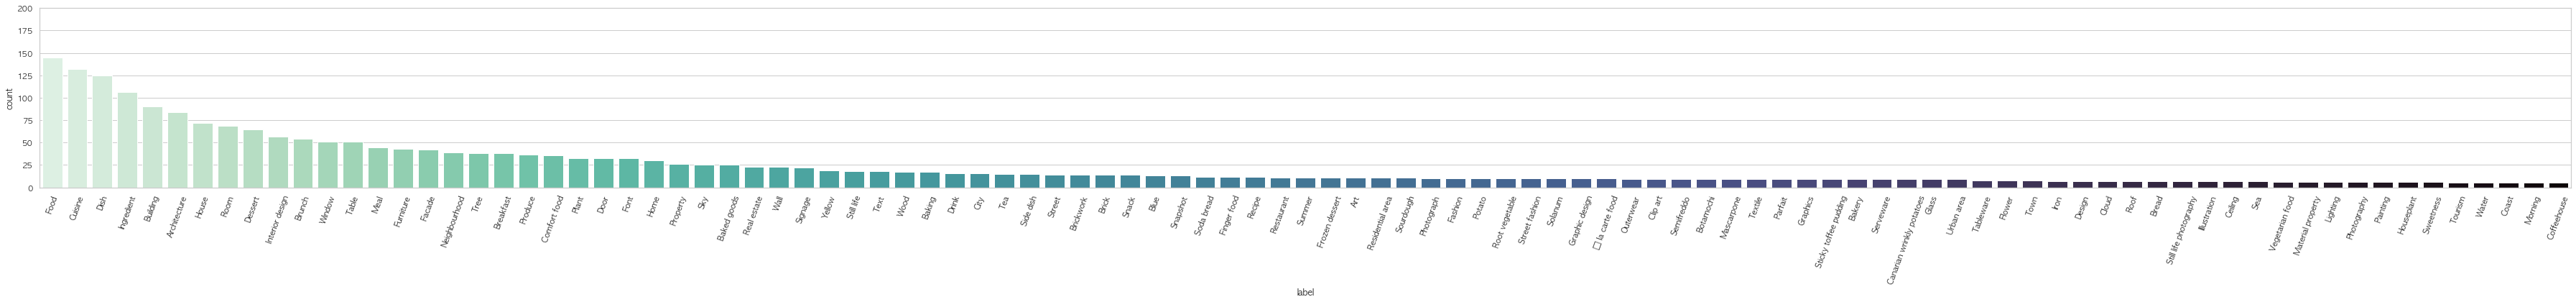

In [84]:
plt.figure(figsize = (50,6))
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},style='whitegrid')
sns.barplot( x = 'label', y = 'count', data= label_gr_100, palette = "mako_r")
plt.xticks(rotation = 70)
plt.ylim(0,200)
plt.tight_layout()

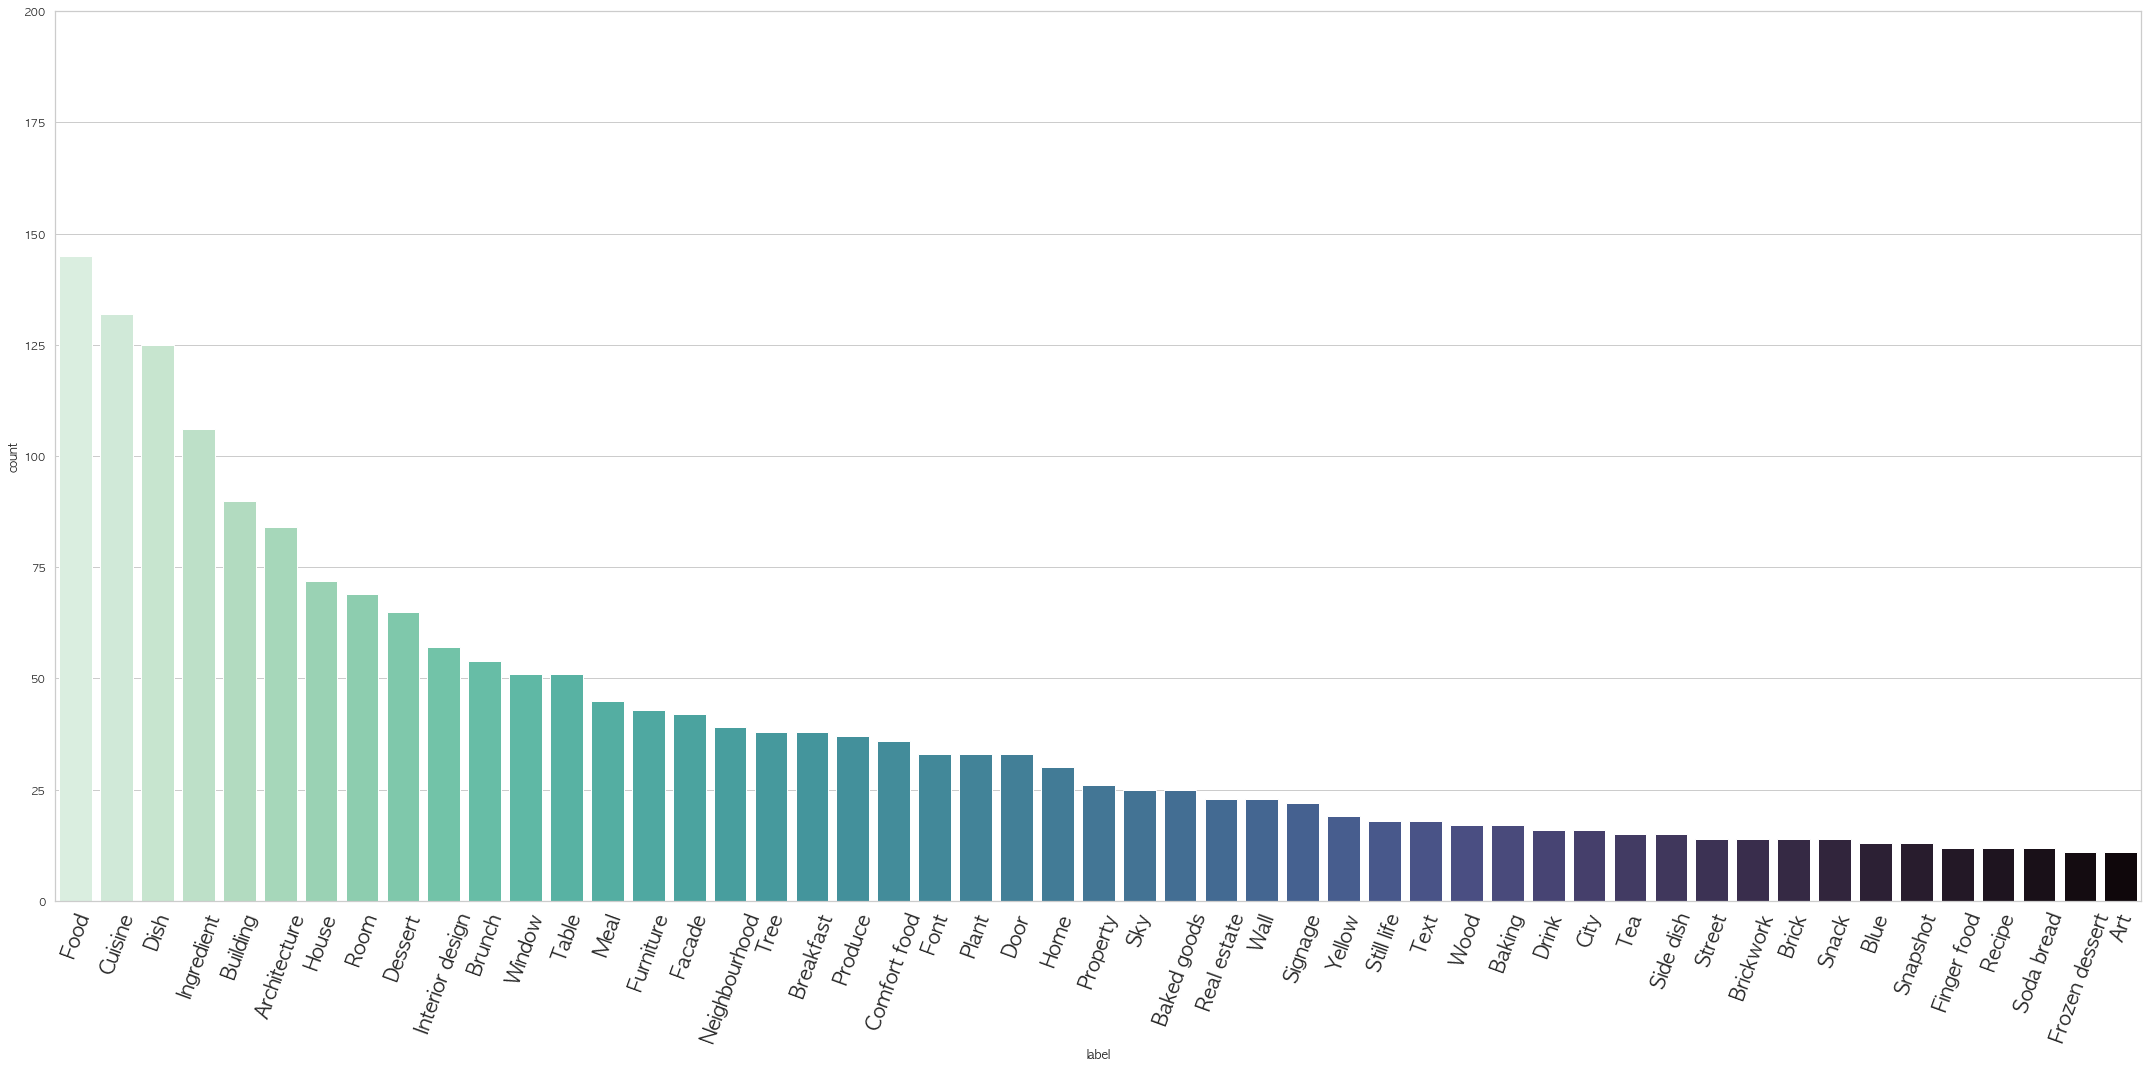

In [14]:

label_gr_50 = label_gr.loc[:50]
plt.figure(figsize = (30,15))
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},style='whitegrid')
sns.barplot( x = 'label', y = 'count', data= label_gr_50, palette = "mako_r")
plt.xticks(rotation = 70,size=20)
plt.ylim(0,200)
plt.tight_layout()


In [41]:
# from konlypy.tag import Twitter

In [ ]:
sum_label

In [5]:
#엔트러사이트

antr_df = pd.read_csv('../hannam_entrs.csv', index_col=0)
antr_df #타협해서 331개 ㅠ

,img_name,label_name
1,엔트러사이트한남1,"Swimming pool,Property,Building,Architecture,L..."
2,엔트러사이트한남2,"Sky,Rainbow,Urban area,Metropolitan area,City,..."
3,엔트러사이트한남3,"Latte,Flat white,Caffè macchiato,Caffeine,Cort..."
4,엔트러사이트한남4,"Yellow,Cut flowers,Flower,Plant,Still life pho..."
5,엔트러사이트한남5,"Yellow,Fashion,Leg,Room,Textile,Long hair,Fash..."
...,...,...
94,엔트러사이트한남94,"Ceiling,Architecture,Interior design,Room,Sky,..."
95,엔트러사이트한남95,"Sweetness,Food,Dessert,Milkshake,Frozen desser..."
96,엔트러사이트한남96,"Sky,Tree,Daytime,Vegetation,Green,Leaf,Atmosph..."
97,엔트러사이트한남97,"Table,Design,Plastic,Tree,Furniture,Square,Arc..."


In [22]:
antr_sum_label = []
for i in range(len(antr_df)) :
    each = antr_df.loc[i+1, 'label_name'].split(',')
    antr_sum_label = antr_sum_label+ each
len(antr_sum_label)

893

In [24]:
# 데이터프레임 만들어서 
counts = list('1'*893)
antr_dic = {'label':antr_sum_label, 'count':counts}
antr_label_df = pd.DataFrame(antr_dic)
antr_label_df['count']  = antr_label_df['count'].astype(int)

#그룹바이
antr_gr = antr_label_df.groupby(antr_label_df['label']).sum()
antr_gr.reset_index(inplace=True)
antr_gr

,label,count
0,Action figure,1
1,Alismatales,1
2,Anthurium,1
3,Architecture,20
4,Art,1
...,...,...
275,Wood,3
276,Wood stain,1
277,Woody plant,1
278,Yellow,7


In [30]:
#sort

antr_gr.sort_values('count', ascending=False, inplace=True)
antr_gr.reset_index(drop=True, inplace=True)

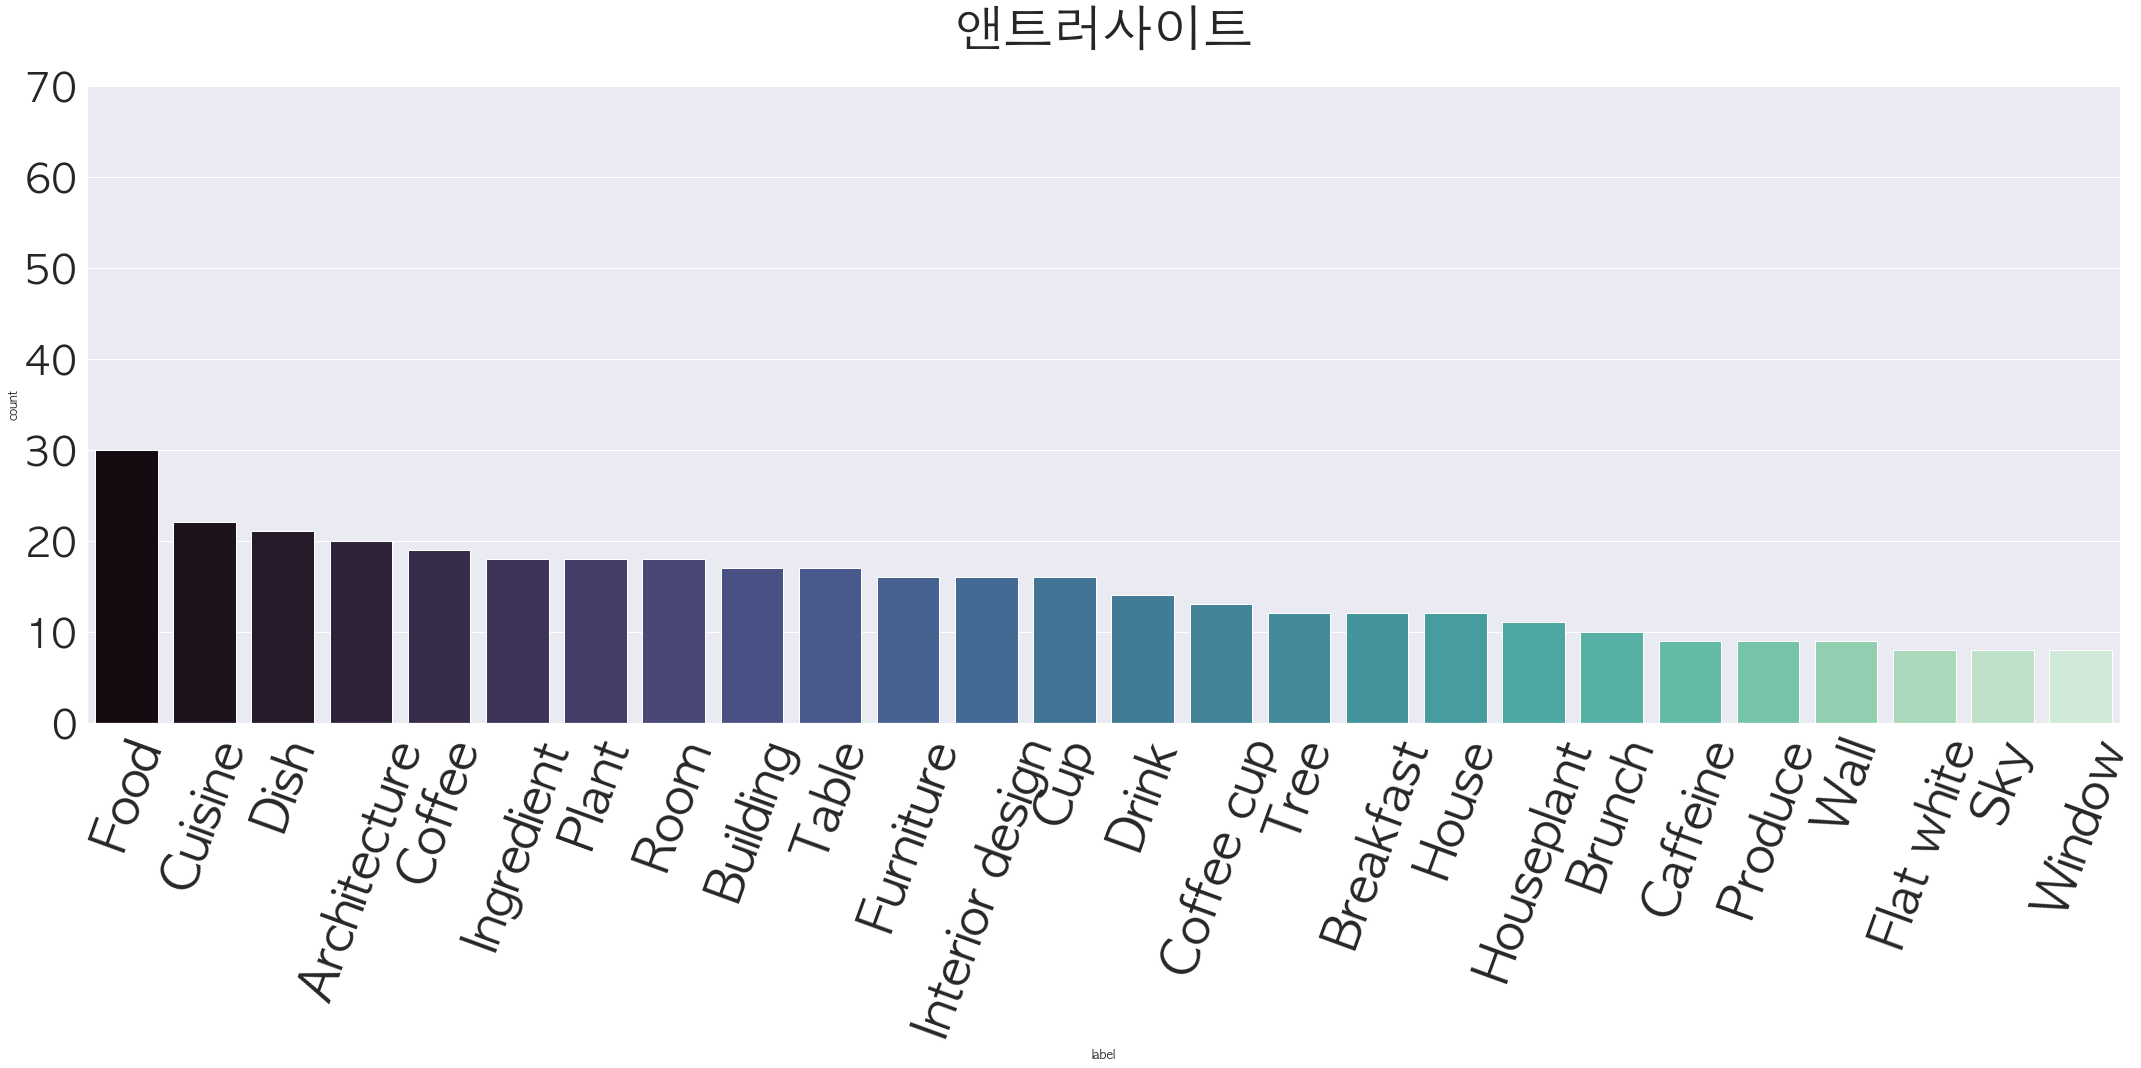

In [86]:

antr_gr_25 = antr_gr.loc[:25]
plt.figure(figsize = (30,15))
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},style='darkgrid')
sns.barplot( x = 'label', y = 'count', data= antr_gr_25, palette = "mako")
plt.xticks(rotation = 70,size=50)
plt.yticks(size=40)
plt.ylim(0,70)
plt.title('앤트러사이트',size =50, pad = 40)
plt.tight_layout()


## 챔프커피

In [6]:
#챔프커피

champ_df = pd.read_csv('../hannam_champcoffee.csv', index_col=0)
antr_sum_label = []

cc_sum_label = []
for i in range(len(champ_df)) :
    each = champ_df.loc[i+1, 'label_name'].split(',')
    cc_sum_label = cc_sum_label+ each
 b 
# 데이터프레임 만들어서 
counts = list('1'*len(cc_sum_label))
cc_dic = {'label':cc_sum_label, 'count':counts}
cc_label_df = pd.DataFrame(cc_dic)
cc_label_df['count']  = cc_label_df['count'].astype(int)
#그룹바이
cc_label_gr = cc_label_df.groupby(cc_label_df['label']).sum()
cc_label_gr.reset_index(inplace=True)

cc_label_gr

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

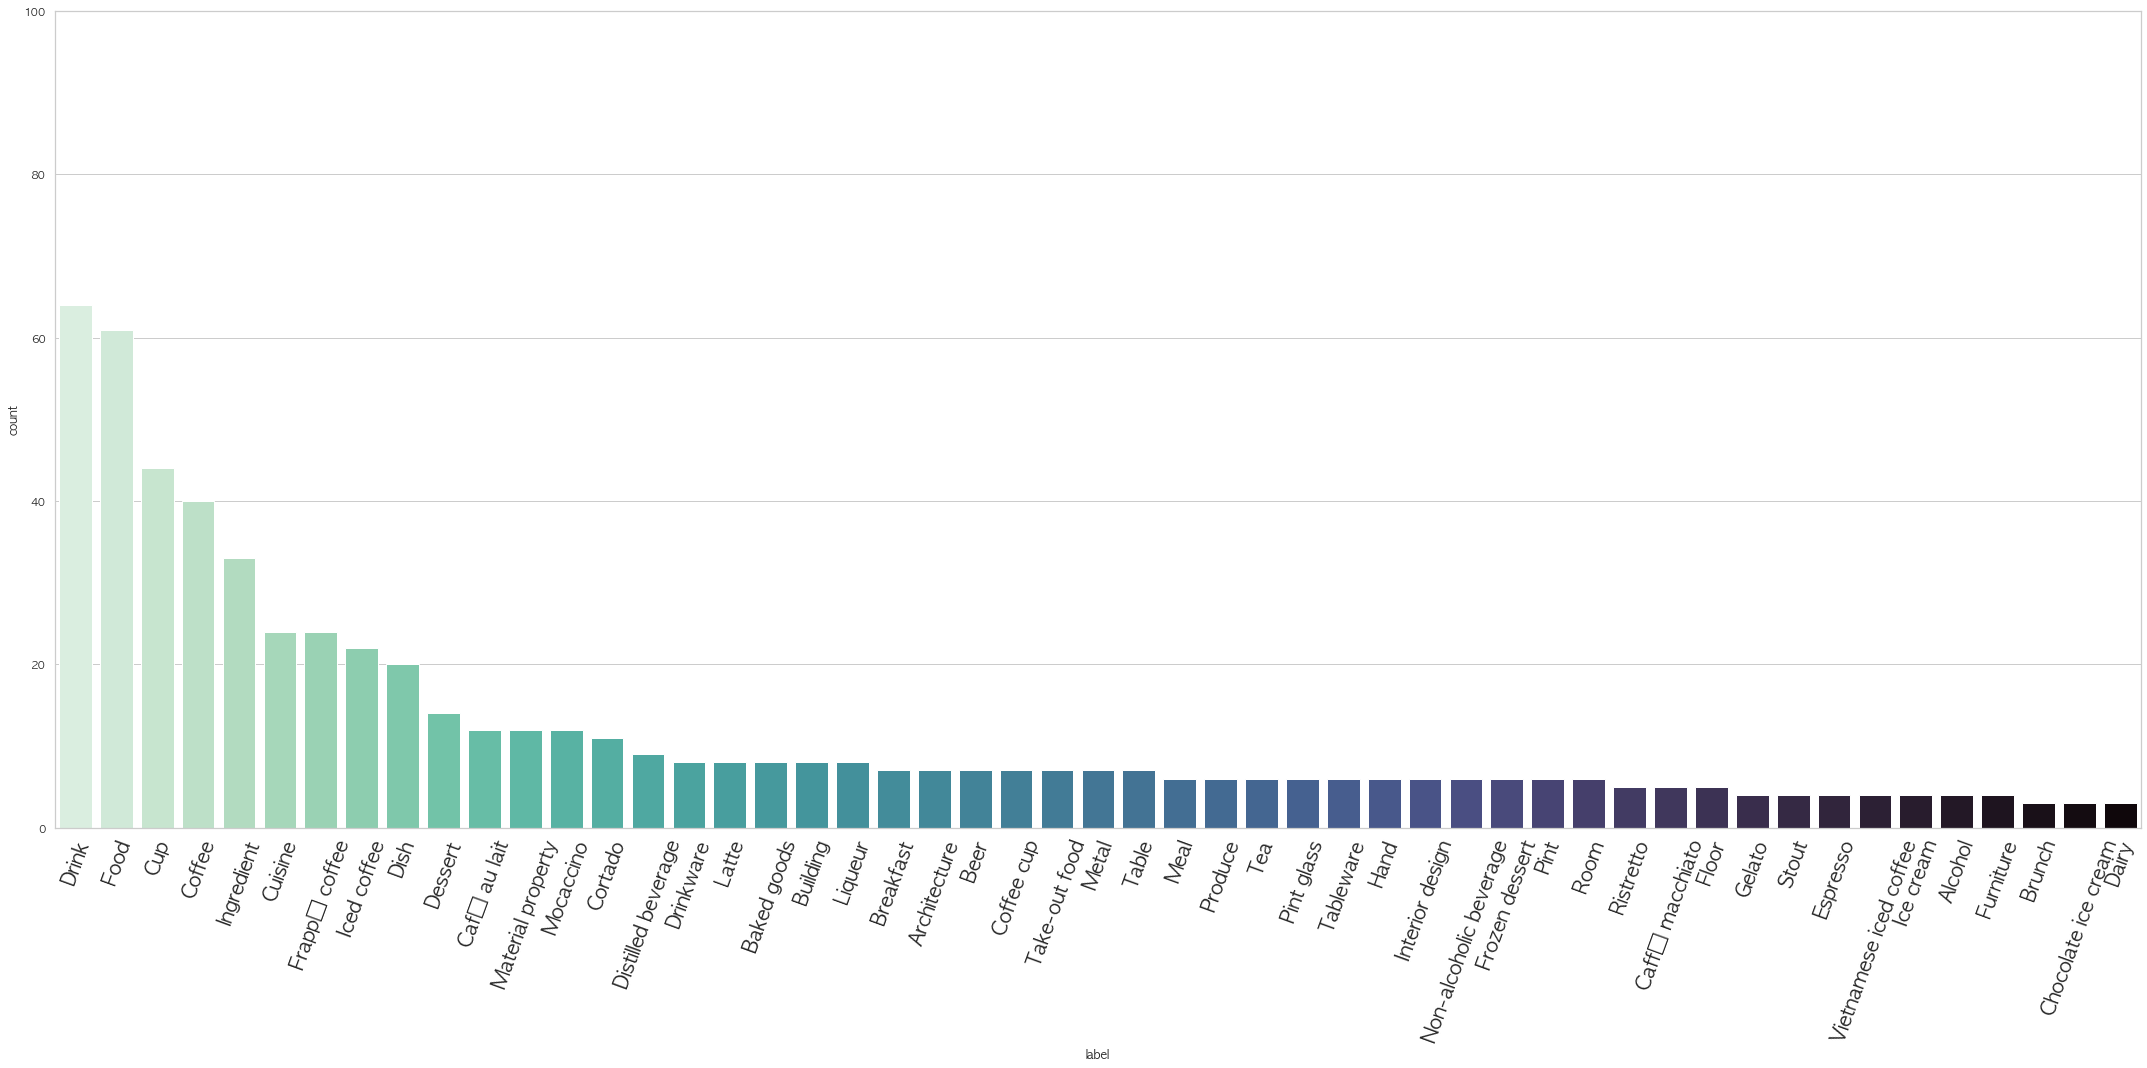

In [40]:
#sort

cc_label_gr.sort_values('count', ascending=False, inplace=True)
cc_label_gr.reset_index(drop=True, inplace=True)

#graph
cc_label_gr_50 = cc_label_gr.loc[:50]
plt.figure(figsize = (30,15))
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},style='whitegrid')
sns.barplot( x = 'label', y = 'count', data= cc_label_gr_50, palette = "mako_r")
plt.xticks(rotation = 70,size=20)
plt.ylim(0,100)
plt.tight_layout()

### 음레코드

In [9]:
#음레코드

um_df = pd.read_csv('../hannam_umrecord.csv', index_col=0)
um_sum_label = []

for i in range(len(um_df)) :
    each = um_df.loc[i+1, 'label_name'].split(',')
    um_sum_label = um_sum_label+ each

# 데이터프레임 만들어서 
counts = list('1'*len(um_sum_label))
um_dic = {'label':um_sum_label, 'count':counts}
um_label_df = pd.DataFrame(um_dic)
um_label_df['count']  = um_label_df['count'].astype(int)
#그룹바이
um_label_gr = um_label_df.groupby(um_label_df['label']).sum()
um_label_gr.reset_index(inplace=True)

um_label_gr

AttributeError: 'float' object has no attribute 'split'

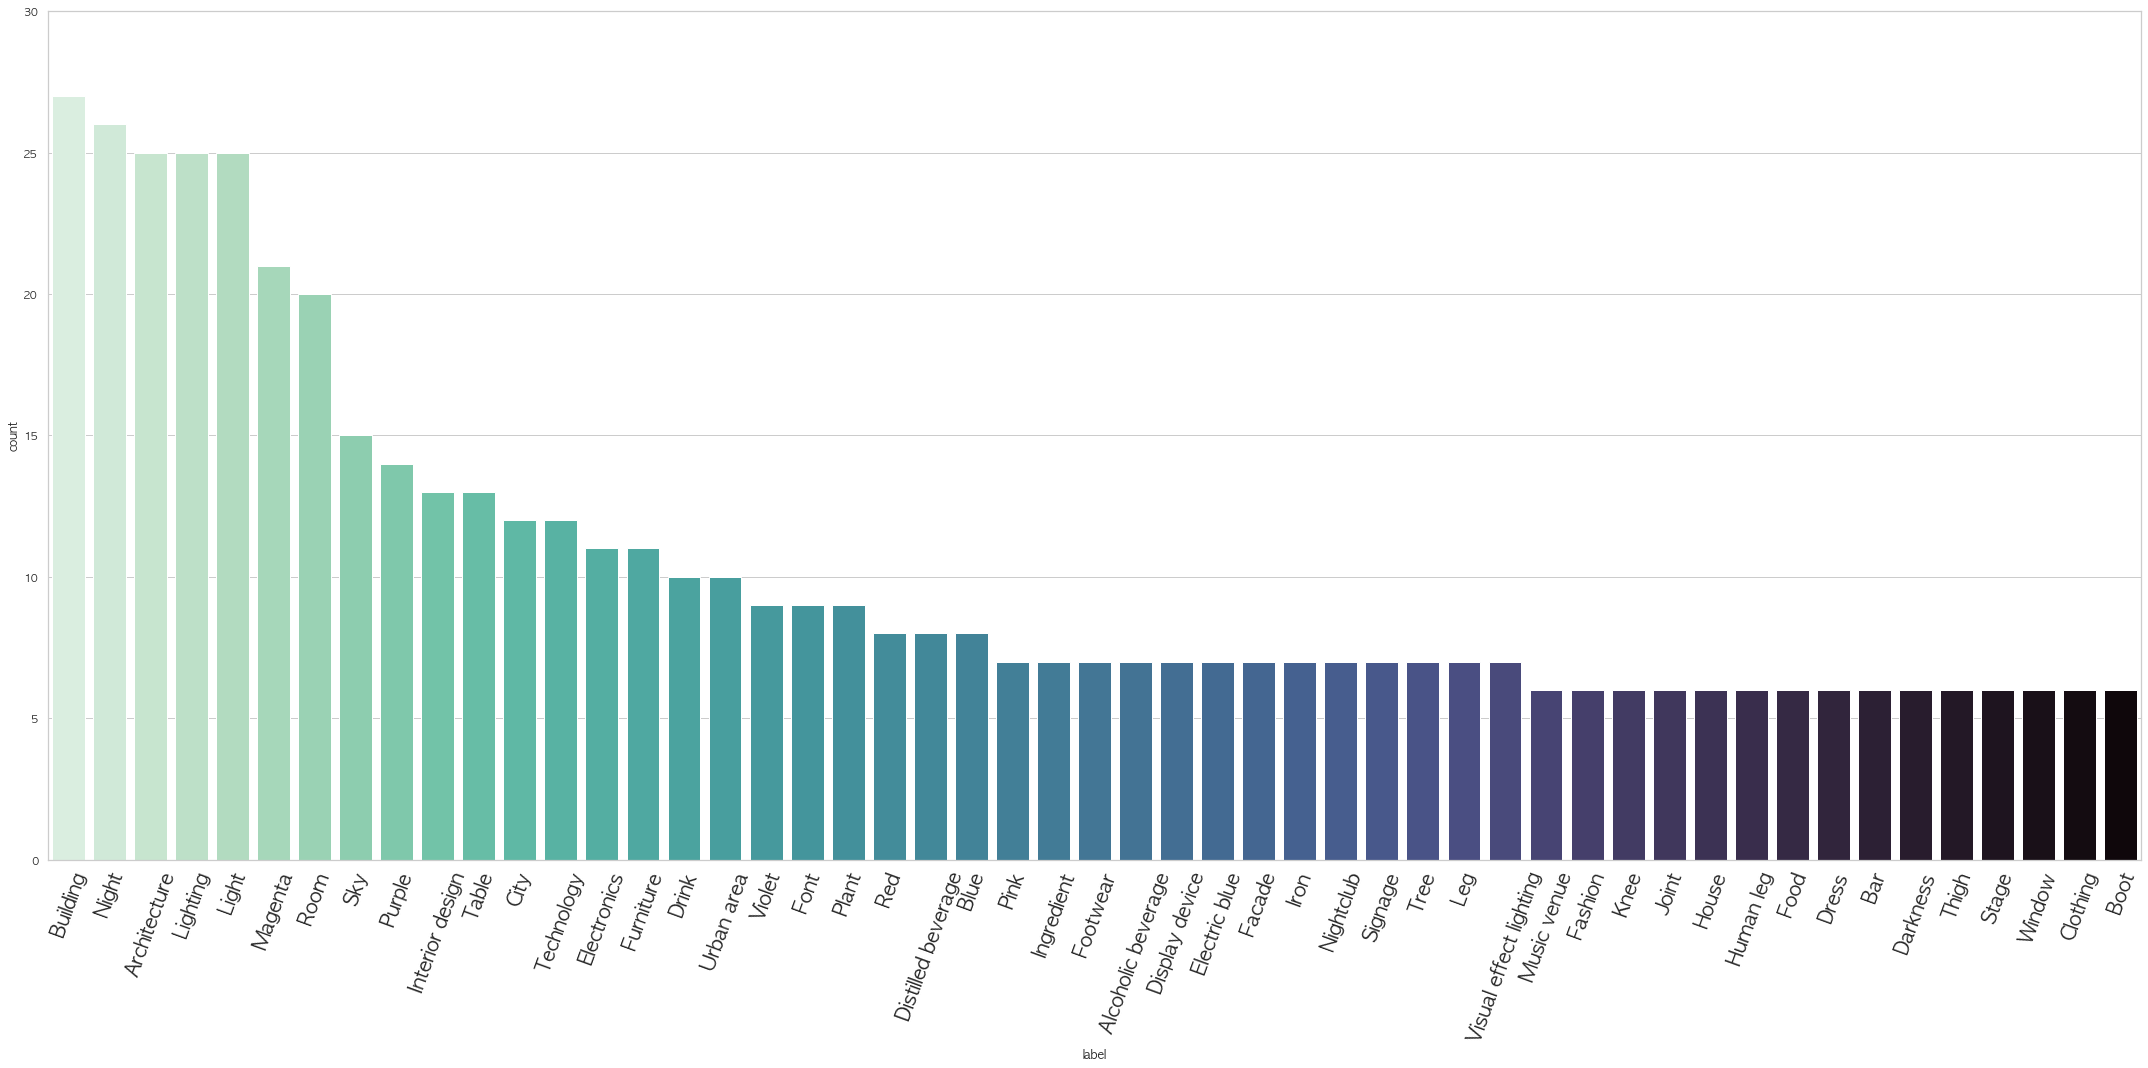

In [60]:

#sort

um_label_gr.sort_values('count', ascending=False, inplace=True)
um_label_gr.reset_index(drop=True, inplace=True)

#graph
um_label_gr_50 = um_label_gr.loc[:50]
plt.figure(figsize = (30,15))
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},style='whitegrid')
sns.barplot( x = 'label', y = 'count', data= um_label_gr_50, palette = "mako_r")
plt.xticks(rotation = 70,size=20)
plt.ylim(0,30)
plt.tight_layout()

In [55]:
# um_df[um_df['label_name'].isnull()]

um_df.loc[54, 'label_name'] = 'nan'
um_df.loc[54, 'label_name']

'nan'

### 사유

In [14]:
#사유카페

# sy_df = pd.read_csv('../hannam_sayoo.csv', index_col=0)
sy_sum_label = []

for i in range(len(sy_df)) :
    each = sy_df.loc[i+1, 'label_name'].split(',')
    sy_sum_label = sy_sum_label+ each

# 데이터프레임 만들어서 
counts = list('1'*len(sy_sum_label))
sy_dic = {'label':sy_sum_label, 'count':counts}
sy_label_df = pd.DataFrame(sy_dic)
sy_label_df['count']  = sy_label_df['count'].astype(int)
#그룹바이
sy_label_gr = sy_label_df.groupby(sy_label_df['label']).sum()
sy_label_gr.reset_index(inplace=True)

sy_label_gr

,label,count
0,Acrylic paint,1
1,Advertising,1
2,Alcoholic beverage,1
3,Aloe,1
4,Antipasto,1
...,...,...
241,Working dog,1
242,Yellow,2
243,geranium,1
244,nan,1


In [13]:
# sy_df[sy_df['label_name'].isnull()]
sy_df.loc[84,'label_name']='nan'

In [65]:
sy_df.loc[84,'label_name']='nan'

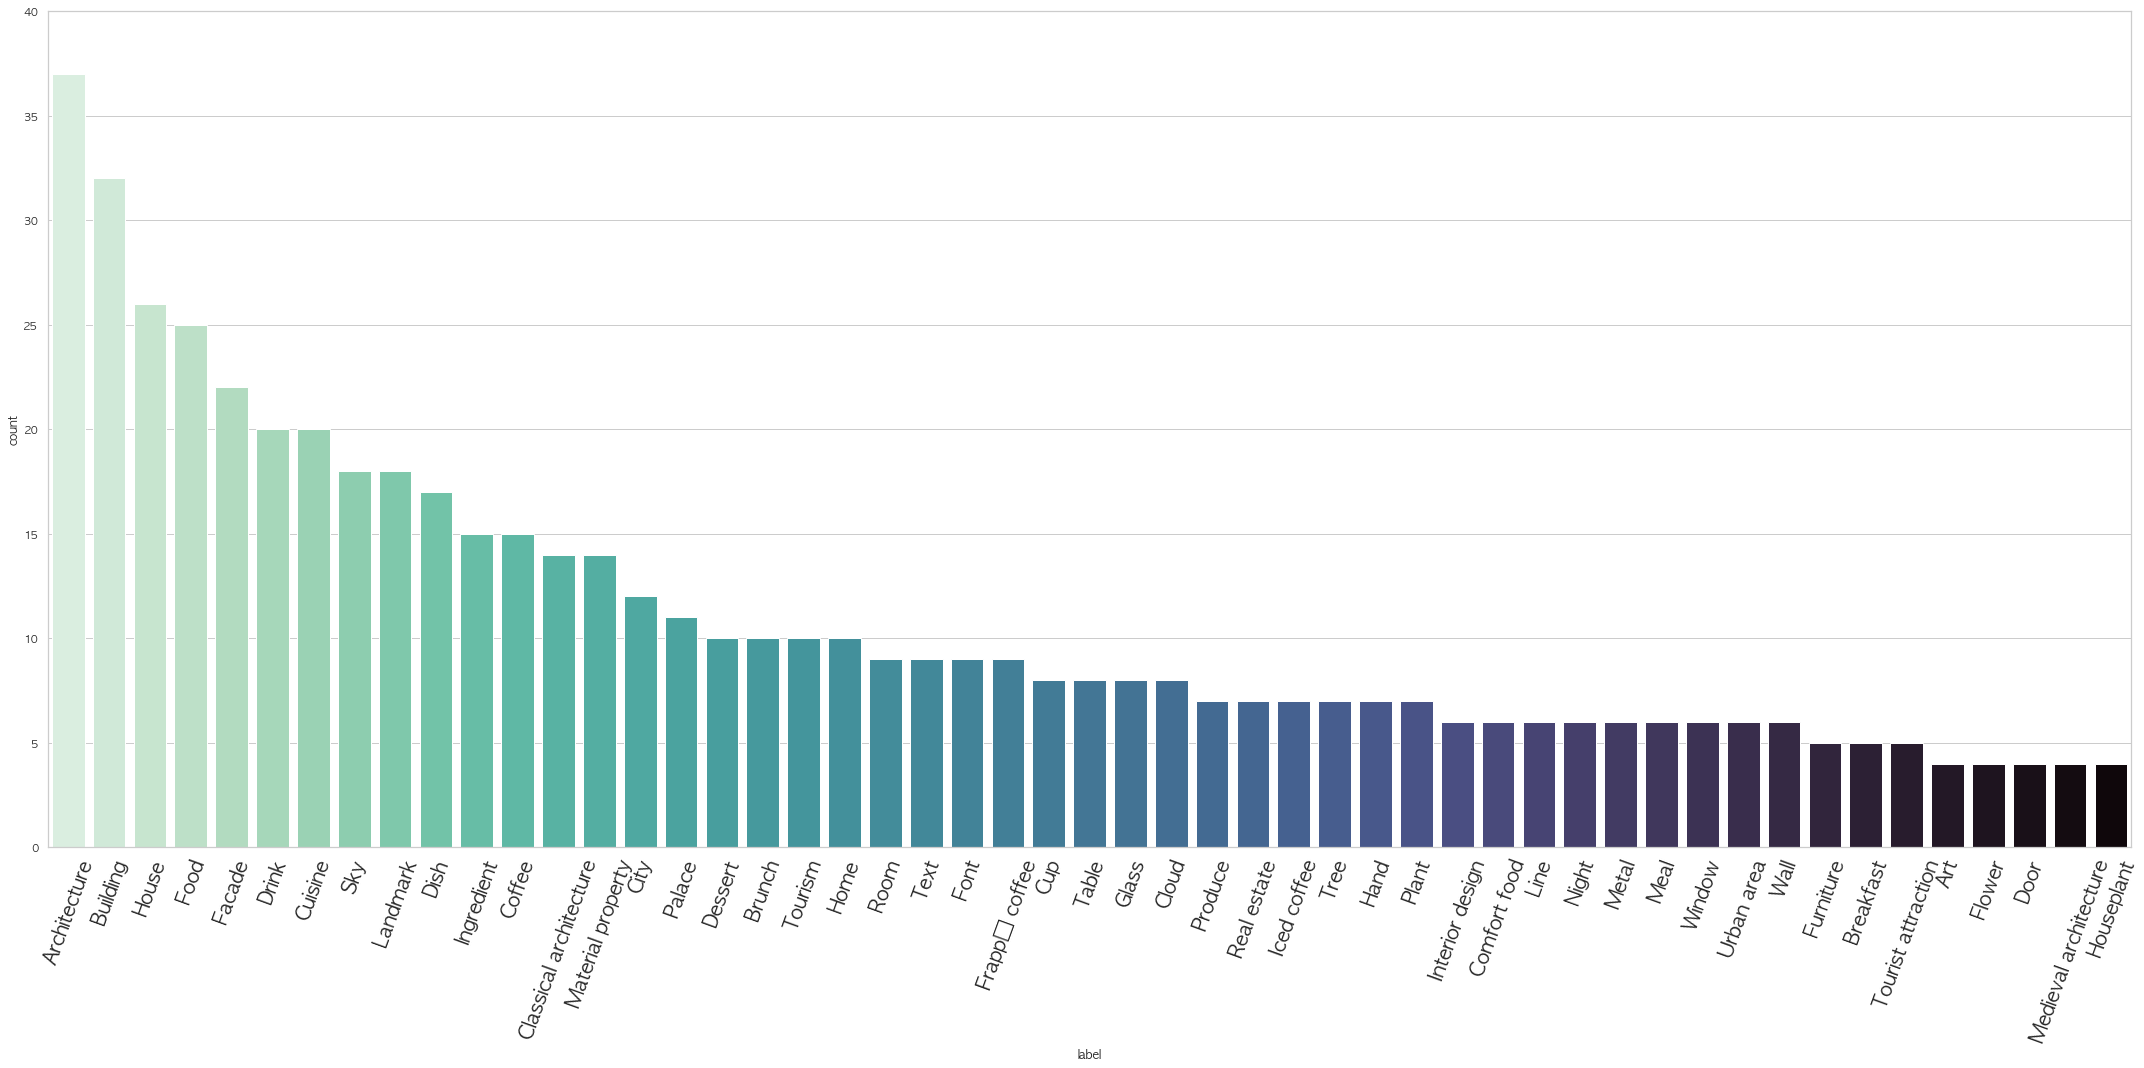

In [69]:
#sort

sy_label_gr.sort_values('count', ascending=False, inplace=True)
sy_label_gr.reset_index(drop=True, inplace=True)

#graph
sy_label_gr_50 = sy_label_gr.loc[:50]
plt.figure(figsize = (30,15))
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},style='whitegrid')
sns.barplot( x = 'label', y = 'count', data= sy_label_gr_50, palette = "mako_r")
plt.xticks(rotation = 70,size=20)
plt.ylim(0,40)
plt.tight_layout()

In [70]:
from PIL import Image as pil

In [71]:
file_name = '/Users/janghan-a/crawling_project/img/sayoo/사유카페1.jpg'
file_name_2 = '/Users/janghan-a/crawling_project/img/sayoo/사유카페2.jpg'
pil.open(file_name, )

ValueError: bad mode '/Users/janghan-a/crawling_project/img/sayoo/사유카페2.jpg'

In [3]:
#한남 mtl

mtl_df = pd.read_csv('../hannam_mtl.csv', index_col=0)
mtl_sum_label = []

for i in range(len(mtl_df)) :
    each = mtl_df.loc[i+1, 'label_name'].split(',')
    mtl_sum_label = mtl_sum_label+ each

# 데이터프레임 만들어서 
counts = list('1'*len(mtl_sum_label))
mtl_dic = {'label':mtl_sum_label, 'count':counts}
mtl_label_df = pd.DataFrame(mtl_dic)
mtl_label_df['count']  = mtl_label_df['count'].astype(int)
#그룹바이
mtl_label_gr = mtl_label_df.groupby(mtl_label_df['label']).sum()
mtl_label_gr.reset_index(inplace=True)

mtl_label_gr

,label,count
0,Alcoholic beverage,3
1,Ankle,1
2,Apartment,1
3,Architecture,23
4,Arm,1
...,...,...
213,Wood,2
214,World,1
215,Yellow,7
216,Zwieback,1


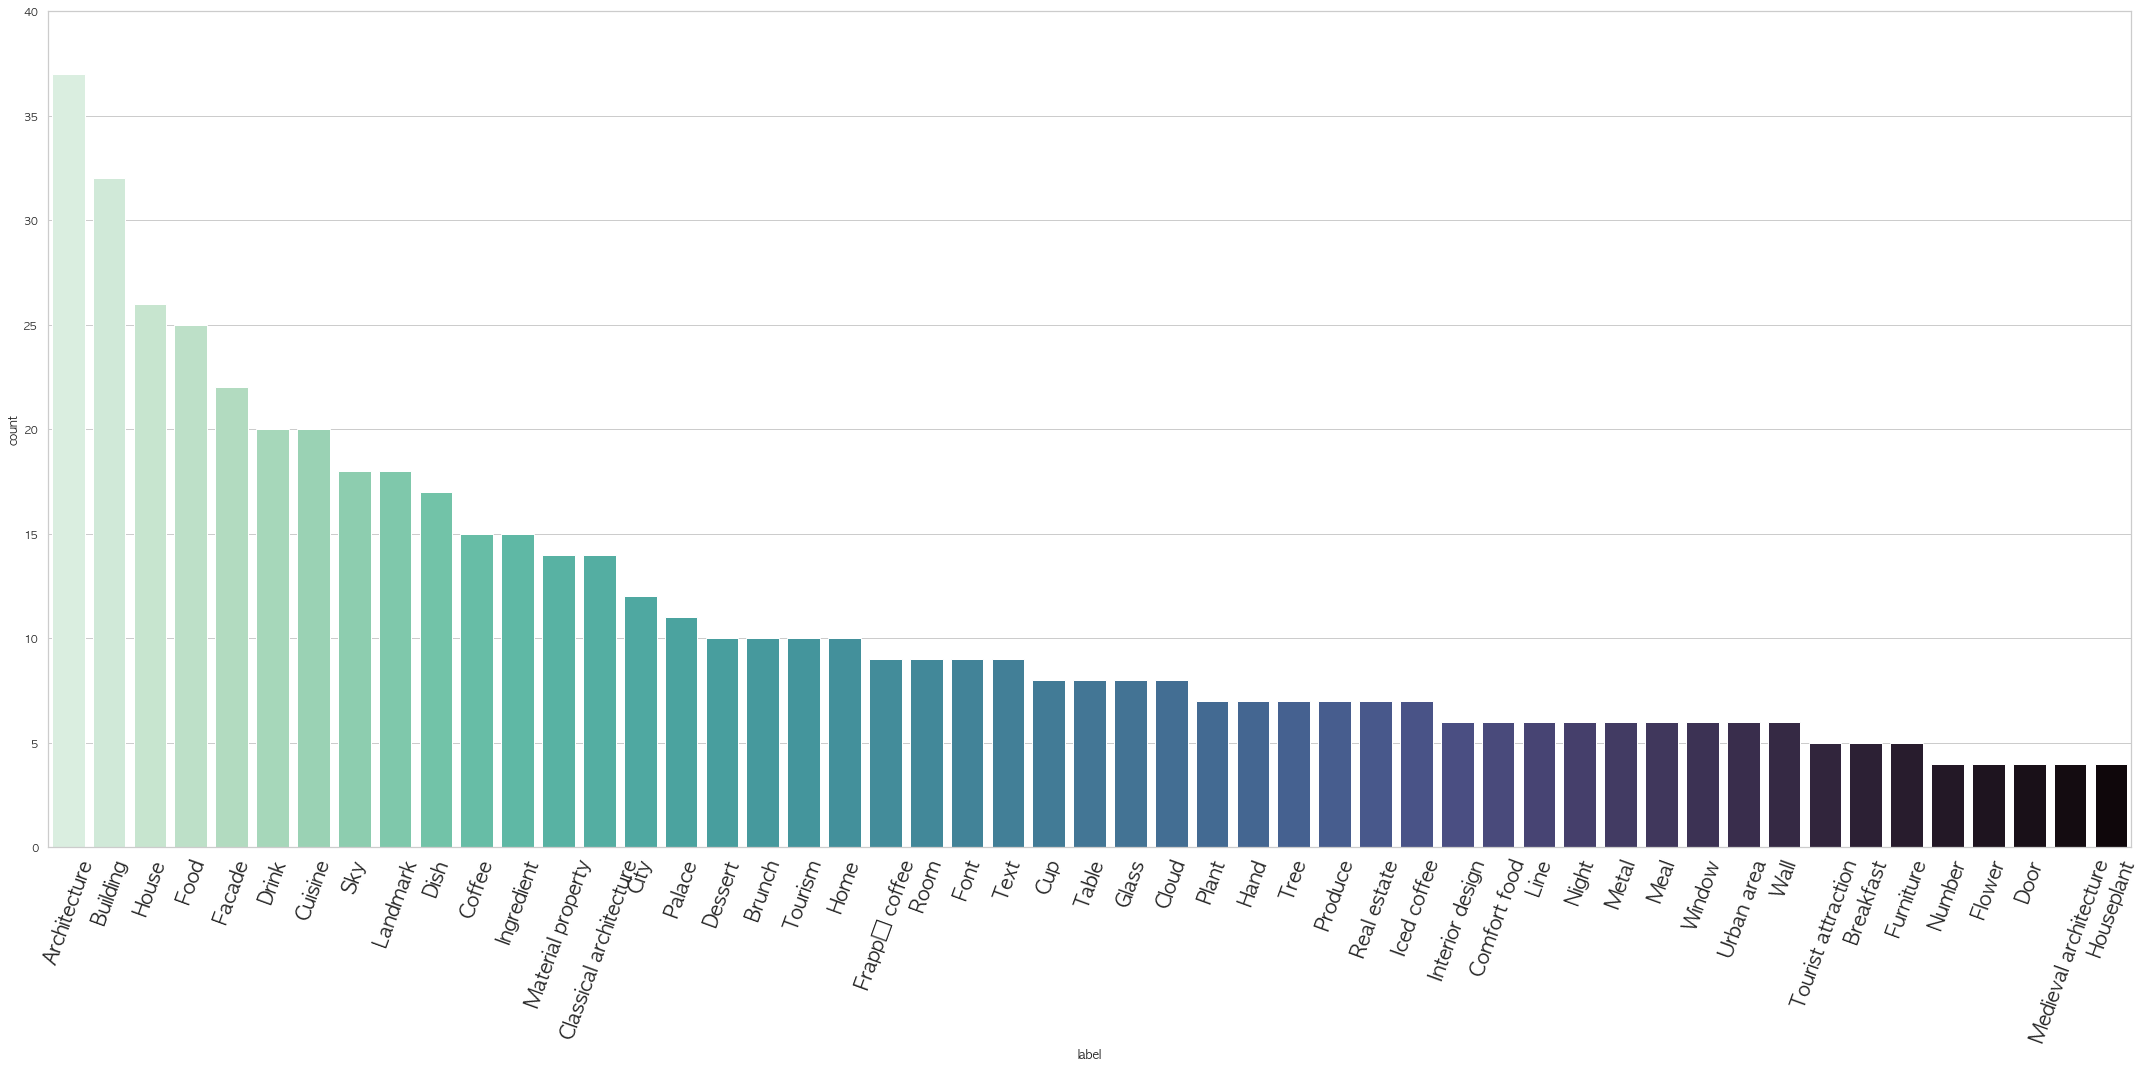

In [19]:
#sort

sy_label_gr.sort_values('count', ascending=False, inplace=True)
sy_label_gr.reset_index(drop=True, inplace=True)

#graph
sy_label_gr_50 = sy_label_gr.loc[:50]
plt.figure(figsize = (30,15))
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},style='whitegrid')
sns.barplot( x = 'label', y = 'count', data= sy_label_gr_50, palette = "mako_r")
plt.xticks(rotation = 70,size=20)
plt.ylim(0,40)
plt.tight_layout()




In [16]:
antr_df.loc[antr_df["label_name"].str.contains(r'(?=.*Building)', regex = True)]

,img_name,label_name
1,엔트러사이트한남1,"Swimming pool,Property,Building,Architecture,L..."
22,엔트러사이트한남22,"Architecture,Furniture,Wall,Building,Table,Tre..."
23,엔트러사이트한남23,"Architecture,Building,Room,Interior design,Cei..."
31,엔트러사이트한남31,"Electronic signage,Neon sign,Neon,Signage,Font..."
40,엔트러사이트한남40,"Swimming pool,Property,Building,Architecture,L..."
49,엔트러사이트한남49,"Property,Wall,Building,Architecture,Lighting,B..."
50,엔트러사이트한남50,"Room,Interior design,Property,Window,Furniture..."
59,엔트러사이트한남59,"Countertop,Furniture,Wall,Wood,Table,Room,Hard..."
61,엔트러사이트한남61,"Interior design,Room,Wall,Table,Floor,Design,F..."
63,엔트러사이트한남63,"Room,Architecture,Interior design,Ceiling,Plan..."


In [15]:
sy_df.loc[sy_df["label_name"].str.contains(r'(?=.*Building)', regex = True)]

,img_name,label_name
2,사유카페2,"Building,Architecture,Landmark,Classical archi..."
3,사유카페3,"Floor,Room,Wall,Interior design,Flooring,Ceili..."
4,사유카페4,"Architecture,Building,Classical architecture,L..."
5,사유카페5,"Architecture,Sky,Building,House,Material prope..."
13,사유카페13,"Drink,Coffee,Cup,Frappé coffee,Food,Glass,Buil..."
17,사유카페17,"Landmark,Architecture,Sky,Building,Classical a..."
25,사유카페25,"Architecture,Building,Sky,House,Photography,Ma..."
28,사유카페28,"Sky,Landmark,Architecture,Building,Cloud,Night..."
31,사유카페31,"Architecture,Building,Palace,Tourism,Travel"
33,사유카페33,"Architecture,Building,Facade,Classical archite..."
